In [1]:
import os
os.getenv("LD_LIBRARY_PATH")

'/home/annazan/miniconda3/envs/fair38/lib/'

In [1]:
!echo $LD_LIBRARY_PATH
!source ~/.bashrc
!echo $LD_LIBRARY_PATH


/bin/bash: /home/annazan/miniconda3/envs/fair38/lib/libtinfo.so.6: no version information available (required by /bin/bash)
:/home/annazan/miniconda3/envs/fair38/lib/
/bin/bash: /home/annazan/miniconda3/envs/fair38/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/annazan/miniconda3/envs/fair38/lib/libtinfo.so.6: no version information available (required by /bin/bash)
:/home/annazan/miniconda3/envs/fair38/lib/


In [2]:

import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
import os
import sys
print(os.getcwd())
os.environ.update(os.environ)
        # Add a new environment variable to the operating system
os.environ["RAMP_HOME"] = os.getcwd()
# Print the environment variables to verify that the new variable was added
print(os.environ["RAMP_HOME"])
sys.path.append('../')
sys.path.append('../ramp-code/')
sys.path.append('ramp-code')


/home/annazan/fAIr-utilities
/home/annazan/fAIr-utilities


In [18]:
import warnings
warnings.filterwarnings("ignore")
os.environ["SM_FRAMEWORK"] = "tf.keras"
import cv2
import ramp.utils
import hot_fair_utilities

# base_path = f"{os.getcwd()}/ramp-data/sample_2"
# base_path = "/home/annazan/fAIr-utilities/ramp-data/test_data/1_Zanzibar"
# base_path = f"{os.getcwd()}/ramp-data/test_data/1_Zanzibar"
base_path = f'{os.getcwd()}/ramp-data/test_data/model95_td370/'
model_input_image_path = f"{base_path}/input"
preprocess_output=f"{base_path}/preprocessed"
train_output = f"{base_path}/train"

In [17]:
# from hot_fair_utilities import preprocess

# preprocess(
#     input_path = model_input_image_path,
#     output_path = preprocess_output,
#     rasterize=True,
#     # rasterize_options=["binary"],
#     rasterize_options=["binary"],
#     georeference_images=True,

# )

In [7]:
# # Make multimask path
# !mkdir ramp-data/test_data/1_Zanzibar/preprocessed/multimasks/
# # Run script for multi-mask: https://github.com/kshitijrajsharma/ramp-code-fAIr/blob/ae33b11364f0a61f278ce9ff93446586704ea275/scripts/multi_masks_from_polygons.py
# !python ramp-code/scripts/multi_masks_from_polygons.py -in_vecs ramp-data/test_data/1_Zanzibar/preprocessed/labels/ -in_chips ramp-data/test_data/1_Zanzibar/preprocessed/chips/ -out ramp-data/test_data/1_Zanzibar/preprocessed/multimasks/ -bwidth 2 -csp 4

/bin/bash: /home/annazan/miniconda3/envs/fair38/lib/libtinfo.so.6: no version information available (required by /bin/bash)
mkdir: cannot create directory ‘ramp-data/test_data/1_Zanzibar/preprocessed/multimasks/’: File exists
/bin/bash: /home/annazan/miniconda3/envs/fair38/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Input polygons directory: ramp-data/test_data/1_Zanzibar/preprocessed/labels/
Input matching image chips directory: ramp-data/test_data/1_Zanzibar/preprocessed/chips/
Output multichannel masks directory: ramp-data/test_data/1_Zanzibar/preprocessed/multimasks/
Boundary mask boundary width: 2
Contact mask contact spacing: 4
10it [00:00, 73071.50it/s]


In [19]:
preprocess_output=f"{base_path}"

from hot_fair_utilities.training.prepare_data import split_training_2_validation
x = split_training_2_validation(preprocess_output, train_output)

ramp home is /home/annazan/fAIr-utilities
python home is None
variables are: src /home/annazan/fAIr-utilities/ramp-data/test_data/model95_td370/
 and dst:/home/annazan/fAIr-utilities/ramp-data/test_data/model95_td370//train


Writing /home/annazan/fAIr-utilities/ramp-data/test_data/model95_td370//train/fair_split_train.csv
Writing /home/annazan/fAIr-utilities/ramp-data/test_data/model95_td370//train/fair_split_val.csv


In [20]:
import datetime
from ramp.training import (
    callback_constructors,
    loss_constructors,
    metric_constructors,
    model_constructors,
    optimizer_constructors,
)

In [21]:
from hot_fair_utilities.training.run_training import manage_fine_tuning_config

output_path=train_output
epoch_size=2
batch_size=2
freeze_layers=False
cfg = manage_fine_tuning_config(
            output_path, epoch_size, batch_size, freeze_layers
        )

In [22]:
cfg

{'experiment_name': 'HOT-OSM Efficient-Unet Finetune model_set1_batch20_epoch20_imgAug',
 'discard_experiment': False,
 'logging': {'log_experiment': True,
  'experiment_log_path': 'ramp-data/TRAIN/fAIr-experiments.csv',
  'experiment_notes': 'Binary Mask model, batchsize 20, 20 epochs on HOT-OSM dataset 1 Multizoom, finetuning from RAMP saved model',
  'fields_to_log': ['experiment_name',
   'experiment_notes',
   'timestamp',
   'num_epochs',
   'batch_size',
   'output_img_shape',
   'input_img_shape',
   'get_loss_fn_name',
   'use_saved_model',
   'use_aug',
   'use_early_stopping',
   'use_clr',
   'random_seed',
   'num_classes',
   'get_optimizer_fn_name',
   'tb_logs_dir',
   'get_model_fn_name',
   'backbone',
   'train_img_dir',
   'train_mask_dir',
   'val_img_dir',
   'val_mask_dir']},
 'datasets': {'train_img_dir': '/home/annazan/fAIr-utilities/ramp-data/test_data/model95_td370//train/chips',
  'train_mask_dir': '/home/annazan/fAIr-utilities/ramp-data/test_data/model95_td

In [23]:
discard_experiment = False
if "discard_experiment" in cfg:
    discard_experiment = cfg["discard_experiment"]
cfg["timestamp"] = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

In [24]:
# specify a function that will construct the loss function
get_loss_fn_name = cfg["loss"]["get_loss_fn_name"]
get_loss_fn = getattr(loss_constructors, get_loss_fn_name)
# Construct the loss function
loss_fn = get_loss_fn(cfg)

the_metrics = []
if cfg["metrics"]["use_metrics"]:
    get_metrics_fn_names = cfg["metrics"]["get_metrics_fn_names"]
    get_metrics_fn_parms = cfg["metrics"]["metrics_fn_parms"]
    assert len(get_metrics_fn_names) == len(get_metrics_fn_parms)
    for get_mf_name, mf_parms in zip(get_metrics_fn_names, get_metrics_fn_parms):
        get_metric_fn = getattr(metric_constructors, get_mf_name)
        print(f"Metric constructor function: {get_metric_fn.__name__}")
        metric_fn = get_metric_fn(mf_parms)
        the_metrics.append(metric_fn)

Metric constructor function: get_sparse_categorical_accuracy_fn


In [19]:
cfg["saved_model"]["use_saved_model"]

True

In [20]:
from tensorflow.keras.metrics import Precision
from pathlib import Path

#### construct optimizer ####
get_optimizer_fn_name = cfg["optimizer"]["get_optimizer_fn_name"]
get_optimizer_fn = getattr(optimizer_constructors, get_optimizer_fn_name)

optimizer = get_optimizer_fn(cfg)

the_model = None

# SG: Using the saved model in this cell
working_ramp_home = os.environ["RAMP_HOME"]
# load (construct) the model
model_path = Path(working_ramp_home) / cfg["saved_model"]["saved_model_path"]
print(f"Model: importing saved model {str(model_path)}")
the_model = tf.keras.models.load_model(model_path)
assert (
    the_model is not None
), f"the saved model was not constructed: {model_path}"

if cfg["freeze_layers"]:
    for layer in the_model.layers:
        layer.trainable = False  # freeze previous layers only update new layers
        # print("Setting previous model layers traininable : False")


print("-------")
print(f'-------{the_metrics}')
print("-------")

# For class 0
precision_class_0 = Precision(class_id=0)
# For class 1
precision_class_1 = Precision(class_id=1)
metrics=[precision_class_0,precision_class_1]
print(f'-------{the_metrics}')
print("-------")

# If you don't want to save the original state of training, recompile the model.
the_model.compile(optimizer=optimizer, loss=loss_fn, metrics=[the_metrics])
# the_model.compile(optimizer=optimizer, loss=loss_fn, metrics=[precision_class_0,precision_class_1])

# the_model.compile(optimizer = optimizer,
#    loss=loss_fn,
#    metrics = [get_iou_coef_fn])

Model: importing saved model /home/annazan/fAIr-utilities/ramp-code/ramp/checkpoint.tf
-------
-------[<keras.metrics.metrics.SparseCategoricalAccuracy object at 0x7f8b7a082c70>]
-------
-------[<keras.metrics.metrics.SparseCategoricalAccuracy object at 0x7f8b7a082c70>]
-------


In [21]:
# Example of loss fn with multiple prediction labels but only binary true labels
y_true = [[[[0, 1]]]]
y_pred = [[[[0.05, 0.95, 0, 0]]], [[[0.1, 0.8, 0.1, 0]]]]
loss_fn(y_true, y_pred)

<tf.Tensor: shape=(2, 1, 1), dtype=float32, numpy=
array([[[2.9957325 ]],

       [[0.22314365]]], dtype=float32)>

In [22]:
the_model.loss(y_true, y_pred)

<tf.Tensor: shape=(2, 1, 1), dtype=float32, numpy=
array([[[2.9957325 ]],

       [[0.22314365]]], dtype=float32)>

In [23]:

cfg["freeze_layers"]

True

In [24]:
cfg["saved_model"]["save_optimizer_state"]

False

In [25]:

print(the_model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 stem_conv (Conv2D)             (None, None, None,   864         ['input_1[0][0]']                
                                32)                                                               
                                                                                                  
 stem_bn (BatchNormalization)   (None, None, None,   128         ['stem_conv[0][0]']              
                                32)                                                           

In [26]:
from ramp.training.augmentation_constructors import get_augmentation_fn
from ramp.utils.misc_ramp_utils import get_num_files
from ramp.data_mgmt.data_generator import (
    test_batches_from_gtiff_dirs,
    training_batches_from_gtiff_dirs,
)
#### define data directories ####
train_img_dir = Path(working_ramp_home) / cfg["datasets"]["train_img_dir"]
train_mask_dir = Path(working_ramp_home) / cfg["datasets"]["train_mask_dir"]
val_img_dir = Path(working_ramp_home) / cfg["datasets"]["val_img_dir"]
val_mask_dir = Path(working_ramp_home) / cfg["datasets"]["val_mask_dir"]

#### get the augmentation transform ####
# aug = None
if cfg["augmentation"]["use_aug"]:
    aug = get_augmentation_fn(cfg)

## RUNTIME Parameters
batch_size = cfg["batch_size"]
input_img_shape = cfg["input_img_shape"]
output_img_shape = cfg["output_img_shape"]

n_training = get_num_files(train_img_dir, "*.tif")
n_val = get_num_files(val_img_dir, "*.tif")
steps_per_epoch = n_training // batch_size
validation_steps = n_val // batch_size
# Testing step , not recommended
if validation_steps <= 0:
    validation_steps = 1

# add these back to the config
# in case they are needed by callbacks
cfg["runtime"] = {}
cfg["runtime"]["n_training"] = n_training
cfg["runtime"]["n_val"] = n_val
cfg["runtime"]["steps_per_epoch"] = steps_per_epoch
cfg["runtime"]["validation_steps"] = validation_steps

train_batches = None

if aug is not None:
    train_batches = training_batches_from_gtiff_dirs(
        train_img_dir,
        train_mask_dir,
        batch_size,
        input_img_shape,
        output_img_shape,
        transforms=aug,
    )
else:
    train_batches = training_batches_from_gtiff_dirs(
        train_img_dir, train_mask_dir, batch_size, input_img_shape, output_img_shape
    )
assert train_batches is not None, "training batches were not constructed"
print(f"-------\n* train img dir{train_img_dir}\n* train mask dir{train_mask_dir}")
print(f"* input img shape{input_img_shape}\n* output img shape{output_img_shape}")

print(train_batches)

-------
* train img dir/home/annazan/fAIr-utilities/ramp-data/test_data/1_Zanzibar/train/chips
* train mask dir/home/annazan/fAIr-utilities/ramp-data/test_data/1_Zanzibar/train/binarymasks
* input img shape[256, 256]
* output img shape[256, 256]
<PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 256, 256, 1), dtype=tf.uint8, name=None))>


In [27]:
# Batches are a tf.data.Dataset type
print(train_batches)

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 256, 256, 1), dtype=tf.uint8, name=None))>


In [29]:
# Get a single batch as numpy to explore
iter = tf.data.Dataset.as_numpy_iterator(train_batches)
(X_batch, y_true_batch) = iter.next()

In [30]:
import numpy as np
# Print useful info
print("Batch size is:", X_batch.shape[0])
# Appears to be floats between 0 and 1
print("Example X entry:", X_batch[0, 0, 0, :])
print("Input data shape (X):", X_batch.shape)
print("Ground truth data shape (y_true):", y_true_batch.shape)
print("Example y_true: ", y_true_batch[1, 0, 0, :])
print(f"The unique labels in the y_true: {np.unique(y_true_batch[0, :, :, 0])}")

Batch size is: 2
Example X entry: [0. 0. 0.]
Input data shape (X): (2, 256, 256, 3)
Ground truth data shape (y_true): (2, 256, 256, 1)
Example y_true:  [0]
The unique labels in the y_true: [0 1]


In [31]:
# Get some predictions from the model for the batch
y_pred_batch = the_model.predict(X_batch)

1/1 [==============================] - 3s 3s/step


In [32]:
# Shape of output predictions
print("Predictions y_pred_batch are:", y_pred_batch.shape)


Predictions y_pred_batch are: (2, 256, 256, 4)


In [33]:
# Example single pixel prediction
single_prediction = y_pred_batch[0, 0, 0, :]
print(single_prediction)

# Single prediction sums to 1: probabilties over the four categories of the model
single_prediction.sum().round()

[9.9283397e-01 3.8708819e-04 6.6278717e-03 1.5105018e-04]


1.0

In [34]:
the_model.loss(y_true_batch, y_pred_batch)

<tf.Tensor: shape=(2, 256, 256), dtype=float32, numpy=
array([[[0.00719184, 0.00163743, 0.00078314, ..., 0.00273354,
         0.00382917, 0.01771392],
        [0.00257339, 0.00035113, 0.0001875 , ..., 0.0018671 ,
         0.00171824, 0.00425469],
        [0.0013764 , 0.00016843, 0.00013517, ..., 0.00075824,
         0.00099681, 0.00275387],
        ...,
        [0.00275304, 0.00040916, 0.00045718, ..., 0.00119245,
         0.00132152, 0.00308526],
        [0.00654305, 0.00064328, 0.00049603, ..., 0.00096906,
         0.00073251, 0.00196883],
        [0.01925141, 0.00276636, 0.0024634 , ..., 0.00283804,
         0.00418869, 0.01054761]],

       [[0.00770679, 0.00183438, 0.00089808, ..., 0.00540379,
         0.00736356, 0.02895815],
        [0.00280761, 0.00040809, 0.0002254 , ..., 0.00480509,
         0.00484222, 0.00905124],
        [0.00153257, 0.00020359, 0.00017749, ..., 0.00257886,
         0.00311687, 0.00616684],
        ...,
        [0.00483973, 0.00105516, 0.00147329, ..., 0.0

In [35]:
# Validation batches
val_batches = test_batches_from_gtiff_dirs(
    val_img_dir, val_mask_dir, batch_size, input_img_shape, output_img_shape
)

assert val_batches is not None, "validation batches were not constructed"
print(f"-------\n* val img dir{val_img_dir}\n* val mask dir{val_mask_dir}\n-------")
print(val_batches)
print('*\n*\n')


-------
* val img dir/home/annazan/fAIr-utilities/ramp-data/test_data/1_Zanzibar/train/val-chips
* val mask dir/home/annazan/fAIr-utilities/ramp-data/test_data/1_Zanzibar/train/val-binarymasks
-------
<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 256, 256, 1), dtype=tf.uint8, name=None))>
*
*



In [36]:
# Set up training
# ---------------
## Callbacks ##
callbacks_list = []

if not discard_experiment:
    # get model checkpoint callback
    if cfg["model_checkpts"]["use_model_checkpts"]:
        get_model_checkpt_callback_fn_name = cfg["model_checkpts"][
            "get_model_checkpt_callback_fn_name"
        ]
        get_model_checkpt_callback_fn = getattr(
            callback_constructors, get_model_checkpt_callback_fn_name
        )
        callbacks_list.append(get_model_checkpt_callback_fn(cfg))

    # get tensorboard callback
    if cfg["tensorboard"]["use_tb"]:
        get_tb_callback_fn_name = cfg["tensorboard"]["get_tb_callback_fn_name"]
        get_tb_callback_fn = getattr(callback_constructors, get_tb_callback_fn_name)
        callbacks_list.append(get_tb_callback_fn(cfg))

    # get tensorboard model prediction logging callback
    if cfg["prediction_logging"]["use_prediction_logging"]:
        assert cfg["tensorboard"][
            "use_tb"
        ], "Tensorboard logging must be turned on to enable prediction logging"
        get_prediction_logging_fn_name = cfg["prediction_logging"][
            "get_prediction_logging_fn_name"
        ]
        get_prediction_logging_fn = getattr(
            callback_constructors, get_prediction_logging_fn_name
        )
        callbacks_list.append(get_prediction_logging_fn(the_model, cfg))

# free up RAM
tf.keras.backend.clear_session()

if cfg["early_stopping"]["use_early_stopping"]:
    callbacks_list.append(callback_constructors.get_early_stopping_callback_fn(cfg))

    # get cyclic learning scheduler callback
if cfg["cyclic_learning_scheduler"]["use_clr"]:
    assert not cfg["early_stopping"][
        "use_early_stopping"
    ], "cannot use early_stopping with cycling_learning_scheduler"
    get_clr_callback_fn_name = cfg["cyclic_learning_scheduler"][
        "get_clr_callback_fn_name"
    ]
    get_clr_callback_fn = getattr(callback_constructors, get_clr_callback_fn_name)
    callbacks_list.append(get_clr_callback_fn(cfg))

Starting Training with 10 epochs , 2 batch size , 4 steps per epoch , 1 validation steps......
Epoch 1/10


4/4 [==============================] - 3s 735ms/step - loss: 0.3854 - sparse_categorical_accuracy: 0.8881 - val_loss: 0.2932 - val_sparse_categorical_accuracy: 0.9050
Epoch 2/10
4/4 [==============================] - 2s 726ms/step - loss: 0.2586 - sparse_categorical_accuracy: 0.9077 - val_loss: 0.2932 - val_sparse_categorical_accuracy: 0.9050
Epoch 3/10
4/4 [==============================] - 2s 723ms/step - loss: 0.2175 - sparse_categorical_accuracy: 0.9520 - val_loss: 0.2932 - val_sparse_categorical_accuracy: 0.9050
Epoch 4/10
4/4 [==============================] - 2s 724ms/step - loss: 0.1447 - sparse_categorical_accuracy: 0.9521 - val_loss: 0.2932 - val_sparse_categorical_accuracy: 0.9050
Epoch 5/10
4/4 [==============================] - 2s 725ms/step - loss: 0.2133 - sparse_categorical_accuracy: 0.9330 - val_loss: 0.2932 - val_sparse_categorical_accuracy: 0.9050
Epoch 6/10
4/4 [==============================] - 2s 726ms/step - loss: 0.1909 - sparse_categorical_accuracy: 0.9311 - va

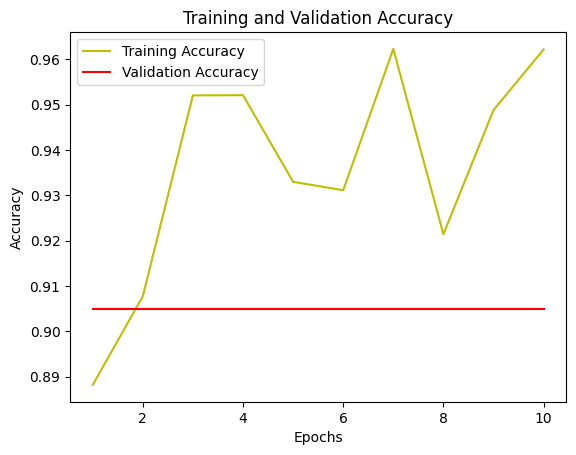

In [39]:
import matplotlib.pyplot as plt
from time import perf_counter

## Main training block ##
n_epochs = cfg["num_epochs"]
# SG: manually make this 10
n_epochs = 10
print(
    f"Starting Training with {n_epochs} epochs , {batch_size} batch size , {steps_per_epoch} steps per epoch , {validation_steps} validation steps......"
)
if validation_steps <= 0:
    raise RaiseError(
        "Not enough data for training, Increase image or Try reducing batchsize/epochs"
    )
# FIXME : Make checkpoint
start = perf_counter()
history = the_model.fit(
    train_batches,
    epochs=n_epochs,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_batches,
    validation_steps=validation_steps,
    callbacks=callbacks_list,
)
end = perf_counter()
print(f"Training Finished , Time taken to train : {end-start} seconds")
print('\n-----\nHistory:')
print(history.history.keys())
print('\n-----')

# plot the training and validation accuracy and loss at each epoch
print("Generating graphs ....")
if not os.path.exists(cfg["graph_location"]):
    os.mkdir(cfg["graph_location"])

loss = history.history["loss"]
# val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)

acc = history.history["sparse_categorical_accuracy"]
val_acc = history.history["val_sparse_categorical_accuracy"]

# Plot training and validation accuracy
plt.plot(epochs, acc, "y", label="Training Accuracy")
plt.plot(epochs, val_acc, "r", label="Validation Accuracy")

# Set labels and title
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")

plt.legend()
plt.savefig(
    f"{cfg['graph_location']}/training_validation_sparse_categorical_accuracy.png"
)
print(f"Graph generated at : {cfg['graph_location']}")
print(f"accuracy {acc}")
print(f"accuracy {val_acc}")
print(f"loss {loss}")


In [ ]:
# APPENDIX: from copying across

#### construct optimizer ####
get_optimizer_fn_name = cfg["optimizer"]["get_optimizer_fn_name"]
get_optimizer_fn = getattr(optimizer_constructors, get_optimizer_fn_name)

optimizer = get_optimizer_fn(cfg)

the_model = None

if cfg["saved_model"]["use_saved_model"]:
    # load (construct) the model
    model_path = Path(working_ramp_home) / cfg["saved_model"]["saved_model_path"]
    print(f"Model: importing saved model {str(model_path)}")
    the_model = tf.keras.models.load_model(model_path)
    assert (
        the_model is not None
    ), f"the saved model was not constructed: {model_path}"

    if cfg["freeze_layers"]:
        for layer in the_model.layers:
            layer.trainable = False  # freeze previous layers only update new layers
            # print("Setting previous model layers traininable : False")

    if not cfg["saved_model"]["save_optimizer_state"]:
        print("-------")
        print(f'-------{the_metrics}')
        print("-------")
        
        # For class 0
        precision_class_0 = Precision(class_id=0)
        # For class 1
        precision_class_1 = Precision(class_id=1)
        metrics=[precision_class_0,precision_class_1]
        print(f'-------{the_metrics}')
        print("-------")
        
        # If you don't want to save the original state of training, recompile the model.
        the_model.compile(optimizer=optimizer, loss=loss_fn, metrics=[the_metrics])
        # the_model.compile(optimizer=optimizer, loss=loss_fn, metrics=[precision_class_0,precision_class_1])
        
        # the_model.compile(optimizer = optimizer,
        #    loss=loss_fn,
        #    metrics = [get_iou_coef_fn])

if not cfg["saved_model"]["use_saved_model"]:
    get_model_fn_name = cfg["model"]["get_model_fn_name"]
    get_model_fn = getattr(model_constructors, get_model_fn_name)
    the_model = get_model_fn(cfg)

    assert the_model is not None, f"the model was not constructed: {model_path}"
    the_model.compile(optimizer=optimizer, loss=loss_fn, metrics=the_metrics)

print(the_model)
cfg["datasets"]

#### define data directories ####
train_img_dir = Path(working_ramp_home) / cfg["datasets"]["train_img_dir"]
train_mask_dir = Path(working_ramp_home) / cfg["datasets"]["train_mask_dir"]
val_img_dir = Path(working_ramp_home) / cfg["datasets"]["val_img_dir"]
val_mask_dir = Path(working_ramp_home) / cfg["datasets"]["val_mask_dir"]

#### get the augmentation transform ####
# aug = None
if cfg["augmentation"]["use_aug"]:
    aug = get_augmentation_fn(cfg)

## RUNTIME Parameters
batch_size = cfg["batch_size"]
input_img_shape = cfg["input_img_shape"]
output_img_shape = cfg["output_img_shape"]

n_training = get_num_files(train_img_dir, "*.tif")
n_val = get_num_files(val_img_dir, "*.tif")
steps_per_epoch = n_training // batch_size
validation_steps = n_val // batch_size
# Testing step , not recommended
if validation_steps <= 0:
    validation_steps = 1

# add these back to the config
# in case they are needed by callbacks
cfg["runtime"] = {}
cfg["runtime"]["n_training"] = n_training
cfg["runtime"]["n_val"] = n_val
cfg["runtime"]["steps_per_epoch"] = steps_per_epoch
cfg["runtime"]["validation_steps"] = validation_steps

train_batches = None

if aug is not None:
    train_batches = training_batches_from_gtiff_dirs(
        train_img_dir,
        train_mask_dir,
        batch_size,
        input_img_shape,
        output_img_shape,
        transforms=aug,
    )
else:
    train_batches = training_batches_from_gtiff_dirs(
        train_img_dir, train_mask_dir, batch_size, input_img_shape, output_img_shape
    )

assert train_batches is not None, "training batches were not constructed"
print(f"-------\n* train img dir{train_img_dir}\n* train mask dir{train_mask_dir}")
print(f"* input img shape{input_img_shape}\n* output img shape{output_img_shape}")

print(train_batches)

val_batches = test_batches_from_gtiff_dirs(
    val_img_dir, val_mask_dir, batch_size, input_img_shape, output_img_shape
)

assert val_batches is not None, "validation batches were not constructed"
print(f"-------\n* val img dir{val_img_dir}\n* val mask dir{val_mask_dir}\n-------")
print(val_batches)
print('*\n*\n')

## Callbacks ##
callbacks_list = []

if not discard_experiment:
    # get model checkpoint callback
    if cfg["model_checkpts"]["use_model_checkpts"]:
        get_model_checkpt_callback_fn_name = cfg["model_checkpts"][
            "get_model_checkpt_callback_fn_name"
        ]
        get_model_checkpt_callback_fn = getattr(
            callback_constructors, get_model_checkpt_callback_fn_name
        )
        callbacks_list.append(get_model_checkpt_callback_fn(cfg))

    # get tensorboard callback
    if cfg["tensorboard"]["use_tb"]:
        get_tb_callback_fn_name = cfg["tensorboard"]["get_tb_callback_fn_name"]
        get_tb_callback_fn = getattr(callback_constructors, get_tb_callback_fn_name)
        callbacks_list.append(get_tb_callback_fn(cfg))

    # get tensorboard model prediction logging callback
    if cfg["prediction_logging"]["use_prediction_logging"]:
        assert cfg["tensorboard"][
            "use_tb"
        ], "Tensorboard logging must be turned on to enable prediction logging"
        get_prediction_logging_fn_name = cfg["prediction_logging"][
            "get_prediction_logging_fn_name"
        ]
        get_prediction_logging_fn = getattr(
            callback_constructors, get_prediction_logging_fn_name
        )
        callbacks_list.append(get_prediction_logging_fn(the_model, cfg))

# free up RAM
keras.backend.clear_session()

if cfg["early_stopping"]["use_early_stopping"]:
    callbacks_list.append(callback_constructors.get_early_stopping_callback_fn(cfg))

    # get cyclic learning scheduler callback
if cfg["cyclic_learning_scheduler"]["use_clr"]:
    assert not cfg["early_stopping"][
        "use_early_stopping"
    ], "cannot use early_stopping with cycling_learning_scheduler"
    get_clr_callback_fn_name = cfg["cyclic_learning_scheduler"][
        "get_clr_callback_fn_name"
    ]
    get_clr_callback_fn = getattr(callback_constructors, get_clr_callback_fn_name)
    callbacks_list.append(get_clr_callback_fn(cfg))

## Main training block ##
n_epochs = cfg["num_epochs"]
print(
    f"Starting Training with {n_epochs} epochs , {batch_size} batch size , {steps_per_epoch} steps per epoch , {validation_steps} validation steps......"
)
if validation_steps <= 0:
    raise RaiseError(
        "Not enough data for training, Increase image or Try reducing batchsize/epochs"
    )
# FIXME : Make checkpoint
start = perf_counter()
history = the_model.fit(
    train_batches,
    epochs=n_epochs,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_batches,
    validation_steps=validation_steps,
    callbacks=callbacks_list,
)
end = perf_counter()
print(f"Training Finished , Time taken to train : {end-start} seconds")
print('\n-----\nHistory:')
print(history.history.keys())
print('\n-----')

# plot the training and validation accuracy and loss at each epoch
print("Generating graphs ....")
if not os.path.exists(cfg["graph_location"]):
    os.mkdir(cfg["graph_location"])

loss = history.history["loss"]
# val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)

acc = history.history["sparse_categorical_accuracy"]
val_acc = history.history["val_sparse_categorical_accuracy"]

# Plot training and validation accuracy
plt.plot(epochs, acc, "y", label="Training Accuracy")
plt.plot(epochs, val_acc, "r", label="Validation Accuracy")

# Set labels and title
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")

plt.legend()
plt.savefig(
    f"{cfg['graph_location']}/training_validation_sparse_categorical_accuracy.png"
)
print(f"Graph generated at : {cfg['graph_location']}")
print(f"accuracy {acc}")
print(f"accuracy {val_acc}")
print(f"loss {loss}")


In [17]:
import pandas as pd
df = pd.read_csv("/home/annazan/fAIr-utilities/ramp-data/test_data/1_Zanzibar/train/fair_split_train.csv")
df.iloc[0, 0]

'/home/annazan/fAIr-utilities/ramp-data/test_data/1_Zanzibar/train/chips/OAM-319293-270962-19.tif'

In [8]:
from hot_fair_utilities import train
train_output = f"{base_path}train"
final_accuracy, final_model_path = train(
    input_path=preprocess_output,
    output_path=train_output,
    epoch_size=2,
    batch_size=2,
    model="ramp",
    model_home=os.environ["RAMP_HOME"]
)

variables are /home/annazan/fAIr-utilities/ramp-data/test_data/1_Zanzibar
 and /home/annazan/fAIr-utilities/ramp-data/test_data/1_Zanzibartrain
Starting to prepare data for training
ramp home is /home/annazan/fAIr-utilities
python home is None
variables are: src /home/annazan/fAIr-utilities/ramp-data/test_data/1_Zanzibar
 and dst:/home/annazan/fAIr-utilities/ramp-data/test_data/1_Zanzibartrain


Traceback (most recent call last):
  File "/home/annazan/fAIr-utilities/ramp-code/scripts/make_train_val_split_lists.py", line 128, in <module>
    main()
  File "/home/annazan/fAIr-utilities/ramp-code/scripts/make_train_val_split_lists.py", line 91, in main
    raise ValueError(f"source directory {src_dir} is not readable")
ValueError: source directory /home/annazan/fAIr-utilities/ramp-data/test_data/1_Zanzibartrain/chips is not readable


CalledProcessError: Command '['python', '/home/annazan/fAIr-utilities/ramp-code/scripts/make_train_val_split_lists.py', '-src', '/home/annazan/fAIr-utilities/ramp-data/test_data/1_Zanzibartrain/chips', '-pfx', '/home/annazan/fAIr-utilities/ramp-data/test_data/1_Zanzibartrain/fair_split', '-trn', '0.85', '-val', '0.15']' returned non-zero exit status 1.

[here a tf file is created (weights + structure)]

In [ ]:
print(final_accuracy,final_model_path)

In [ ]:
prediction_output = f"{os.getcwd()}/outputs/model51_td364/prediction"

In [ ]:


from hot_fair_utilities import predict


print(f"\n**\n** prediction output {prediction_output}")
print(f"\n**\n** prediction input {base_path}prediction/input")
predict(
    checkpoint_path=final_model_path,
    input_path=f"{base_path}prediction/input",
    prediction_path=prediction_output,
)

In [ ]:
from hot_fair_utilities import polygonize
geojson_output= f"{prediction_output}/prediction.geojson"
polygonize(
    input_path=prediction_output, 
    output_path=geojson_output,
    remove_inputs = True,
)